## Basit Doğrusal Regression
Temel amaç bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır. <br>
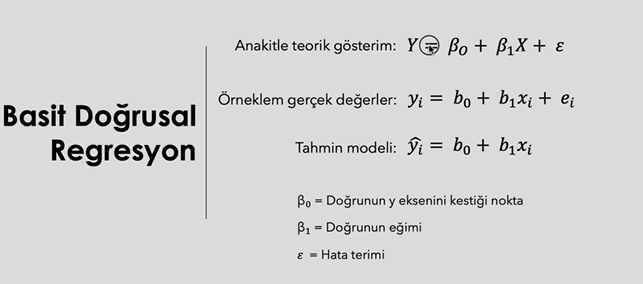 <br> 
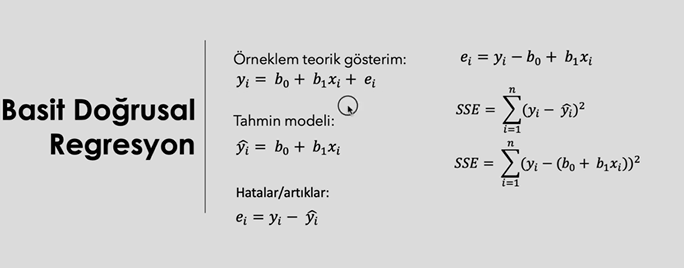 <br>
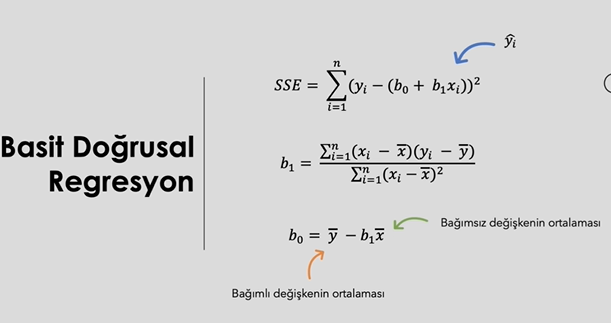 <br>
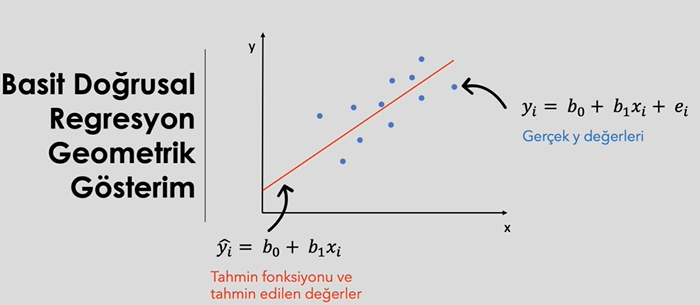 <br>

## Basit Doğrusal Regression - Uygulama
### 1 - Keşifçi Veri Analizi

In [1]:
import pandas as pd

In [163]:
ad = pd.read_csv('Advertising.csv')
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [164]:
df = df.drop('Unnamed: 0',axis=1) # unnamed değişkenini sildik

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T # betimsel

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.isnull().sum() # eksik veri

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.corr() # correlation  // ilişki // tv-sales => pozitif

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
import seaborn as sns

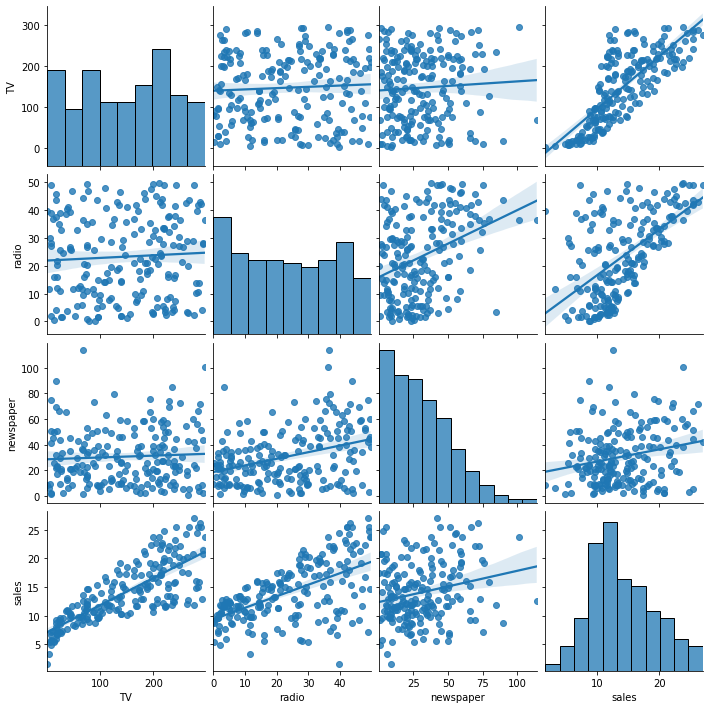

In [9]:
sns.pairplot(df,kind='reg'); # pairplot matrix

In [10]:
# tv-sales arasında iyi bir ilişki var
# tv dağılımı 2 tepeli bir yapı
# radio-sales arasında bir ilişki var
# radio-tv arasında ilişki iyi değil. Sonuç olarak 2 farklı ilişki kümesi oluşmuş

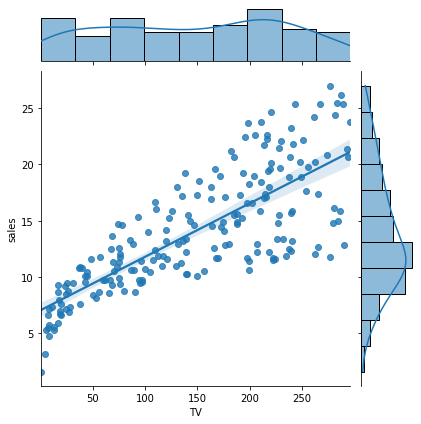

In [11]:
sns.jointplot(x='TV',y='sales',data=df,kind='reg'); 

### Statsmodels ile Modelleme

In [168]:
import statsmodels.api as sm

In [169]:
X = df[['TV']]
X[:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [170]:
X = sm.add_constant(X) # tek değişkeni olduğundan yanına bir sabit değişken ekledik. doğrusal fonks const

In [171]:
X[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [172]:
y = df['sales']

In [173]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [18]:
lm = sm.OLS(y,X) # model initialized

In [19]:
model = lm.fit()

***Summary Sonucu Analiz***
* R-squared => bağımsız değişkenler bağımlı değişkendeki değişimi ***ne kadar açıklayabiliyor (61%)***
* Adj. R-squared => çok fazla değişken eklediğimizde R-squared artacaktır. Yanılgı da artacaktır. ***Dikkatliliği düşüktür, hızlı yükselmez.***
* F-statistic => bir model kurduğumuzda ve sonuç almaya başladığımızda ***bu modelin anlamlı olup olmadığının score'udur.***
* Prob(F-statistic) => modelin anlamlılığının p-value değeridir. p-value < a => model anlamlı
* AIC & BIC => modelleri karşılaştırmak için kullanılır.
* No. Observations => gözlem sayısı
* Df Residuals => serbestlik derecesi

***Weight tablosu (ß değerler tablosu)***
* coef sütunu altındaki 2 değer bizim modelimizin weight(β0 ve β1) değerleridir. 
* const-coef => bizim ***β0 değerimizdir***.
* TV - coef => bizim ***ß1 değerimizdir***. Bu ayrıca TV'nin bir birimlik artışının sale'e etkisini de belirtmektedir 
* buna göre modelimizin çıktısı => ***0.0475x + 7.0326 = y*** 
* std err => katsayıların ***standart error*** değerleridir. (standart sapma hata değeri)
* t ve p>t değerleri ***p-value*** değerlerinin gösterimidir. ve bu değerlerin ***anlamlılığını belirtir***.
* 0.025 - 0.975 => ***güven aralığını*** belirtir. const için => 6.130-7.935 (95% ihtimalle)


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        11:35:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
## farklı gösterim

In [22]:
import statsmodels.formula.api as smf
lm = smf.ols('sales ~ TV',df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        11:36:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
## sadece (katsayılar) ağırlıklar

In [24]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [27]:
## sadece katsayılar tablosu

In [28]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [30]:
## katsayıların güven aralıkları

In [29]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [34]:
## sadece modelin anlamlılığı istatistiği (p-value)

In [33]:
model.f_pvalue

1.467389700194647e-42

In [35]:
## modelin f-istatistiği

In [36]:
model.fvalue

312.144994372713

In [37]:
## katsayı (parametre-weight) anlamlılığı 

In [39]:
model.tvalues

Intercept    15.360275
TV           17.667626
dtype: float64

In [40]:
## mean squared error

In [43]:
model.mse_model # değer çok yüksek // ortalama 14 iken

3314.618166868649

In [47]:
## çaprazlamanın açıklanabilirliği (anlamlılığı) %61

In [46]:
model.rsquared

0.611875050850071

In [48]:
## düzeltilmiş r kare

In [49]:
model.rsquared_adj

0.6099148238341623

In [50]:
## modelin tahmin ettiği değerler

In [51]:
model.fittedvalues[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [52]:
## gerçek değerler

In [53]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [54]:
## modelin fonksiyonu

In [63]:
print('sales = %.2f*TV + %.2f' % (model.params[0],model.params[1]))

sales = 7.03*TV + 0.05


In [64]:
## modelin görsel formu

/home/bodur/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


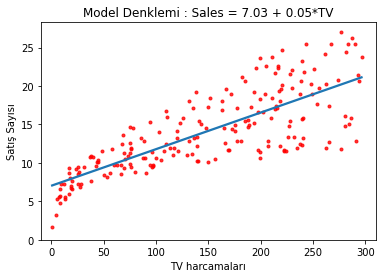

In [70]:
import matplotlib.pyplot as plt

g = sns.regplot(df.TV,df.sales,ci=None,scatter_kws = {'color' : 'r','s' : 9});
g.set_title('Model Denklemi : Sales = 7.03 + 0.05*TV')
g.set_ylabel('Satış Sayısı')
g.set_xlabel('TV harcamaları')

plt.xlim(-10,310);
plt.ylim(bottom=0);

### Sklearn ile modelleme

In [71]:
from sklearn.linear_model import LinearRegression

In [84]:
X = df[['TV']]
y = df[['sales']]

In [185]:
reg = LinearRegression()

In [186]:
model = reg.fit(X,y)

In [86]:
## ß1 için

In [88]:
model.intercept_[0]

7.032593549127695

In [89]:
## ß0 için

In [95]:
model.coef_[0][0]

0.04753664043301975

In [96]:
## R-kare değeri | r-square

In [97]:
model.score(X,y)

0.611875050850071

In [100]:
## tahmin edilen değerler X'e göre

In [98]:
model.predict(X)[:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

## Tahmin
modelimizi kurduk sıra ise bu model ile tahminler oluşturmaya
### sales = 7.03 + TV * 0.04 

* Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri kaç olur?

In [101]:
7.03 + 30*0.04

8.23

In [141]:
# modelin kurulumu
X = df[['TV']]
y = df[['sales']]
reg = LinearRegression()
model = reg.fit(X,y)

In [104]:
# tahmin üretme

In [107]:
model.predict([[30]])

array([[8.45869276]])

In [108]:
# birden fazla tahmin

In [116]:
# yeni veri = [[5],[90],[200]] // np reshape ile matrix oluşumu daha kolay 
yeni_veri = np.array([5,90,200]).reshape((-1,1))

In [115]:
model.predict(yeni_veri)

array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [159]:
from sklearn.metrics import mean_squared_error , r2_score
import statsmodels.formula.api as smf
import numpy as np

In [160]:
# tekrar model oluşturalım

In [174]:
lm = smf.ols('sales ~ TV',df)
model = lm.fit()

In [175]:
# mean squared error

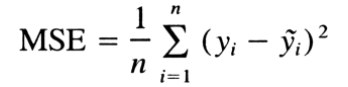

In [176]:
mse = mean_squared_error(y,model.fittedvalues)
mse 

10.512652915656757

In [127]:
# root mean squared error

In [131]:
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [160]:
reg.predict(X)[:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [133]:
# karşılaştırma tablosu

In [162]:
gercek_y = y[:10].values.reshape(-1)
tahmin_y = reg.predict(X)[:10].reshape(-1)

k_t = pd.DataFrame({'gercek_y' : gercek_y,'tahmin_y' : tahmin_y})

In [164]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [165]:
## hata column'u

In [166]:
k_t['hata'] = k_t.gercek_y - k_t.tahmin_y

In [167]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [169]:
k_t['hata_kare'] = k_t.hata ** 2

In [171]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [173]:
k_t['hata_kare'].sum() # toplam

92.90350329638102

In [175]:
k_t['hata_kare'].mean() # ort

9.290350329638102

In [177]:
np.sqrt(k_t['hata_kare'].mean()) # hata kare - karekok

3.048007599996775

### Çalışma Mantığı
makine öğrenmesi arka planında çalışan uygulamada bu hata kare-karekok değerleri üzerinden tekrar geçilip. Optimizasyon sağlanır ve yeni katsayılar üretilir. <br>

### Önemli notlar
* modeli oluşturduktan ve artıkları hesapladıktan sonra çok uzak tutturduklarını incelemek (gözlemi) önemlidir.
* model başarı oranı root-mean-squared error üzerinden ölçülmez. ne kadar tutturduğunun hipotezini göstermeliyiz.

In [178]:
# model üzerinden artıkları almak

In [190]:
model.resid

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
         ...   
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: float64

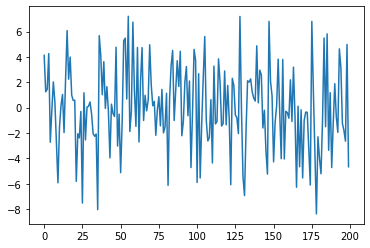

In [192]:
plt.plot(model.resid);

## Çoklu Doğrusal Regression
amaç birden çok feature'in bağımlı değişkene etkilerini hesaplamak.  <br>
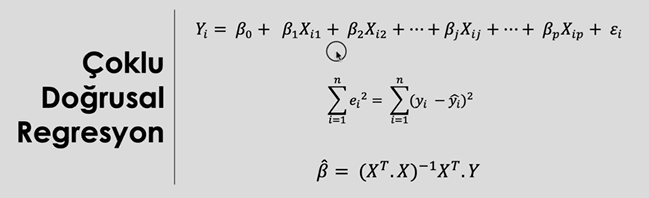 <br>

### Çıktı Örnek
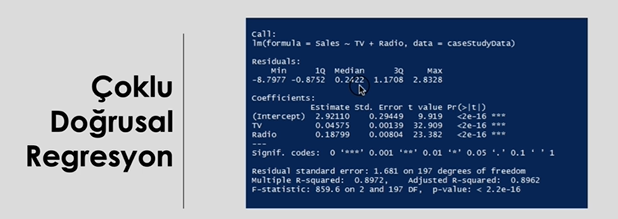

### Çoklu Doğrusal Regresyon Varsayımlar
* Hatalar ***normal dağılır.***
* Hatalar ***birbirinden bağımsızdır*** ve aralarında ***otokorelasyon yoktur***.
* Her bir gözlem için ***hata terimleri varyansları sabittir***.
* Değişkenler ile hata terimi arasında ***ilişki yoktur***.
* Bağımsız değişkenler arasında ***çoklu doğrusal ilişki problemi*** yoktur.

### Regresyon Modellerinin Avantaj ve Dezavantajları
* Iyi anlaşılırsa diğer tüm ML ve DL konuları çok rahat kavranır.
* Doğrusallık nedensellik yorumları yapılabilmesini sağlar, bu durum aksiyoner ve stratejik modelleme imkanı verir. 
* Değişkenlerin etki düzeyleri ve anlamlılıkları değerlendirilebilir.
* Bağımlı değişkendeki değişkenliğin ***açıklanma başarısı ölçülebilir.*** (***r2 değeri***)
* ***Model anlamlılığı değerlendirilebilir.***
* Varsayımları vardır.
* Aykırı gözlemlere duyarlıdır.

## Çoklu Doğrusal Regresyon - Uygulama

In [194]:
import pandas as pd
ad = pd.read_csv('Advertising.csv',usecols=[1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [195]:
# tüm bağımsız değişkenleri seçme

In [198]:
X = df.drop('sales',axis=1)
X[:5]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [199]:
y = df['sales']

In [200]:
# test-train ayırma

In [201]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [228]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.20, random_state=42) #random_state herkese aynı çıksın diye

In [205]:
## test_size 0.2 | train 0.8

In [207]:
X_train.shape

(160, 3)

In [209]:
y_train.shape

(160,)

In [211]:
X_test.shape

(40, 3)

In [213]:
y_test.shape

(40,)

In [215]:
# ihtiyaca göre tam veri setini saklayalım

In [214]:
training = df.copy() 

### Statsmodels ile Çoklu Regresyon
***yorumlama*** yapabilmek için statsmodels daha iyi

In [232]:
# constant eklemedik çünkü başarı değerleri düşüyor.

In [229]:
lm = sm.OLS(y_train,X_train)

In [230]:
model = lm.fit()

### Yorumlama
* r2 değeri artmış => 98.2%
* model anlamlı
* katsayılar incelendiğinde her birisinin p-value < a => bütün katsayılar anlamlı

In [231]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Fri, 16 Jul 2021   Prob (F-statistic):                   1.28e-137
Time:                        17:16:04   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### scikit-learn model

In [237]:
# scikit learn otomatik olarak sabit sayı ekler. bu sebeple sonuçlar farklı çıkacaktır.

In [233]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [234]:
model.intercept_

2.979067338122629

In [236]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin
model denklemi : <br>
sales = 2.97 + TV * 0.04 + radio * 0.18 + newspaper * 0.002

* Örneğin 30 birim TV , 10 birim radio, 40 birimde gazete harcaması olursa sale değeri kaç olur ?

In [240]:
yeni_veri = np.array([30,10,40]).reshape(-1,1)
yeni_pd = pd.DataFrame(yeni_veri).T

In [243]:
yeni_pd

,0,1,2
0,30,10,40


In [244]:
# tahmin

In [245]:
model.predict(yeni_pd)

array([6.32334798])

In [249]:
# modelin eğitim hatası

In [248]:
rmse = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

In [250]:
rmse

1.644727765644337

In [251]:
# modelin test hatası

In [253]:
rmse_test = np.sqrt(mean_squared_error(y_test,model.predict(X_test))) # model bu verileri daha hiç görmedi

In [254]:
rmse_test

1.78159966153345

## Model Tuning / Model Doğrulama
çoklu regresyonda herhangi ***bir dışsal parametre yok*** (en yakın dışsal parametre ß0 - ama oda içsel)  <br>
Bu sebeple biz burada ***validasyon işlemi yapıcağız.***

In [255]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [294]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.20, random_state=30)
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [260]:
# random state 42

In [257]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train))) 

1.644727765644337

In [259]:
model.score(X_train,y_train) # değişkenlerin açıklama oranı

0.8957008271017818

In [261]:
# random state 99

In [265]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train))) 

1.7236824822650751

In [267]:
model.score(X_train,y_train) # değişkenlerin açıklama oranı

0.8906288862925659

### Train set için validasyon

In [280]:
# cross value score
# train set içinden birden çok grup seçip score hesaplıyor

In [286]:
r2_scores = cross_val_score(model,X_train,y_train,cv=10, scoring='r2')
r2_scores

array([0.91245644, 0.92453248, 0.85814127, 0.92005307, 0.8783077 ,
       0.93204044, 0.87656032, 0.5495448 , 0.90023107, 0.79649734])

In [278]:
scores.mean()

0.8548364931257494

In [282]:
# negative mean squared için 

In [295]:
rmse_scores = np.sqrt( - cross_val_score(model,
                         X_train,
                         y_train,
                         cv=10, 
                         scoring='neg_mean_squared_error'))

rmse_scores.mean()

1.6907200506314743

### Test set için validasyon

In [296]:
rmse_scores = np.sqrt( - cross_val_score(model,
                         X_test,
                         y_test,
                         cv=10, 
                         scoring='neg_mean_squared_error'))
rmse_scores.mean()

1.613634825231107

In [299]:
cross_val_score(model, X_test, y_test, cv=10, scoring='r2').mean()

0.8019418713391891

## PCR - Temel Bileşen Regresyonu
bağımsız değişkenler üzerinde ***boyut indirgeme*** uygulandıktan sonra yapılan modelleme işlemidir. <br>
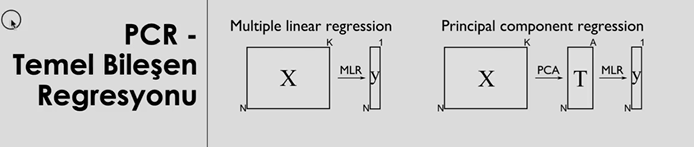 <br>
Çoklu doğrusal regresyonda, ***Çoklu Doğrusal Bağlantı***'dan bahsetmiştik. verisetinin ***bağımsız değişkenleri*** arasındaki ***korelasyon yüksek*** ise <br>
bu değişkenlerin taşıdığı bilgiler ***benzerlik içerebilirler***. Bu sebeple modelin ***ß değerleri üzerinde bozukluğa*** (yanlılığa) sebep olur. <br>

* Mean Squared Error hesaplanmasında varyansını arttırmaktadır (Yanlılık).
* bazen değişken sayısı > örnek, bu durumda bide değişkenler arasında korelasyon var ise sıkıntı büyür.

### PCR Mantığı
100 bileşenli bir verisetini indirgeyerek, bazen veri kaybederek düşük değişken sayısına indirgemektir. <br>
Buradaki değişkenlerin korelasyonu çok düşüktür. 

### PCR Model - Uygulama

In [300]:
import pandas as pd

In [301]:
hit = pd.read_csv('Hitters.csv')

In [303]:
df = hit.copy()

In [305]:
df.isnull().sum() # salary de eksiklikler var. Direkt kaldırabiliriz.

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [307]:
df = df.dropna()

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [310]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [311]:
## kategorik değişkenleri dummy değişkene döndürelim

In [313]:
dms = pd.get_dummies(df[['League','Division','NewLeague']])
dms.head() # one-hot encoding

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [317]:
## burada sadece 2 classa sahip kategorik değişkenler var (dummy tuzağı!!!!)

## Kategorik değişkenleri çıkardık ve dummy'lerden her bir türden bir tanesini ekledik.

In [315]:
X_ = df.drop(['League','Division','NewLeague'],axis=1).astype('float64')

In [318]:
X_ = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1) 

In [320]:
# bağımlı değişkeni çıkaralım (salary)

In [322]:
y = X_['Salary']

In [323]:
X = X_.drop('Salary',axis=1)

In [324]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [325]:
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [326]:
# test-train ayırma

In [333]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [329]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.25, random_state = 42 )

training = df.copy() # yedek

In [330]:
# PCA işlemleri

In [331]:
from sklearn.decomposition import PCA

In [332]:
pca = PCA() # içinde bileşen sayısı arg var ama girmiyoruz

In [336]:
X_reduced_train = pca.fit_transform(scale(X_train)) # fonk scaling istediğinden // veriyi -3,3 arasında istiyor

In [342]:
X_reduced_train[:1,:] # ilk bileşen 

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [350]:
# değişkenlerin bağımlı değişken üzerindeki varyansı açıklama oranı // r2-değeri

# ilk 10 değişkenin kümülatif olarak r2 değeri...

# 10. değer 10 adet değişkenin birlikte açıklama oranı // 2. değer 2 değişken

In [348]:
np.cumsum(pca.explained_variance_ratio_)[:10] # ilk 10 değişkenin 

array([0.38184334, 0.59888836, 0.70885381, 0.788902  , 0.84188327,
       0.88460296, 0.92064688, 0.94874295, 0.96352107, 0.97290914])

In [351]:
# PCA amacı düşük değişken sayısı ile ifade etmek...
# 19 değişken var ve biz 5 değişken ile ne kadar büyük bir değere sahibiz?

In [353]:
np.cumsum(pca.explained_variance_ratio_)[:5] # 84%

array([0.38184334, 0.59888836, 0.70885381, 0.788902  , 0.84188327])

In [354]:
# model kurumu

In [355]:
lm = LinearRegression()

In [356]:
pcr_model = lm.fit(X_reduced_train , y_train) # indirgenmiş veri_seti

In [358]:
pcr_model.intercept_

543.4834416243655

In [359]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [360]:
y_pred = pcr_model.predict(X_reduced_train)

In [361]:
y_pred[:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [362]:
# train hata hesabı

In [363]:
np.sqrt(mean_squared_error(y_train,y_pred))

289.3292825564976

In [365]:
df.Salary.mean() # ortalama 535 olan salary de 289 hata oranı

535.9258821292775

In [367]:
r2_score(y_train,y_pred) # düşük

0.5770075250410179

In [368]:
# test hata hesabı

In [369]:
pca2 = PCA()

In [370]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [371]:
y_pred = pcr_model.predict(X_reduced_test)

In [375]:
np.sqrt(mean_squared_error(y_test,y_pred)) # ort 515 olan salary de 405 hata oranı // fazlaaaa

405.1575364149965

In [373]:
y_test.mean() 

513.3677121212121

## Model Tuning
bu verisetinden oluşturulan modeldeki ***hiperparametreler, değişken sayılarıdır***. <br>
***Değişken sayıları*** üzerinde oynanarak ***modelin başarı oranı*** arttırılabilir. Çünkü ***PCA uyguladığımızdan*** <br>
eskisinden daha değerli ve daha yoğun bilgiye sahip daha az değişken sayısı içeren veri-setimiz oldu.

In [384]:
# 19 değişken ile 

In [380]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train,y_train)

In [382]:
y_pred = pcr_model.predict(X_reduced_test)

In [383]:
np.sqrt(mean_squared_error(y_test,y_pred))

405.1575364149965

In [392]:
# 1 bileşen ile

In [399]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:1],y_train)
pcr_model.coef_ # bir tane

array([111.13977427])

In [400]:
y_pred = pcr_model.predict(X_reduced_test[:,:1])

In [401]:
np.sqrt(mean_squared_error(y_test,y_pred))

392.3893558949346

In [393]:
# 2 bileşen ile => 396

In [394]:
# 10 bileşen ile => 390

In [410]:
# bu iş için algoritma yok ondan kendimiz el ile yapıyoruz

In [404]:
from sklearn import model_selection

In [407]:
# shuffle gruplara ayrılmadan önce verilerin karıştırılıp karıştırılmayacağı bilgisini taşır

In [434]:
cv_10 = model_selection.KFold(n_splits = 10 , shuffle=True, random_state = 1) # 10 katlı cross validation

In [435]:
lm = LinearRegression()

In [436]:
RMSE = []

In [437]:
for i in np.arange(1,X_reduced_train.shape[1] + 1):
    # score validation
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

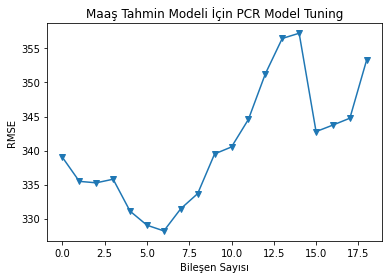

In [438]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [439]:
# optimum bileşen sayımız 6 

In [440]:
# tekrardan model oluşturalım

In [441]:
lm = LinearRegression()

In [447]:
pcr_model = lm.fit(X_reduced_train[:,0:6],y_train) # model fit edildi

In [448]:
# train için değer

In [449]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6]) # tahmin

In [450]:
np.sqrt(mean_squared_error(y_train,y_pred))

308.8265983094501

In [451]:
# test için değer

In [452]:
pca_test = PCA()

In [453]:
X_reduced_test = pca_test.fit_transform(scale(X_test))

In [455]:
y_test_pred = pcr_model.predict(X_reduced_test[:,:6])

In [456]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

393.1198700096223

In [458]:
## değerleri cross validation ile bakmak 
# çok gerekli değil çünkü modelleri hep aynı test veriseti ile değerlendireceğimizden. Aralarındaki farkı görmeye yeter

In [463]:
np.sqrt(-model_selection.cross_val_score(lm,X_reduced_test,y_test.ravel(),cv=10,scoring = 'neg_mean_squared_error')).mean()

442.67964676550946

## PLS - Kısmi En Küçük Kareler Regresyonu
Mantık olarak PCR ile aynıdır. Bileşen sayısını azaltarak az bileşenle çok performanslı tahminler elde etmek. <br>
Değişkenler arasındaki yüksek korelasyon sorunu ve çok boyutluluk problemi başta gelir <br>
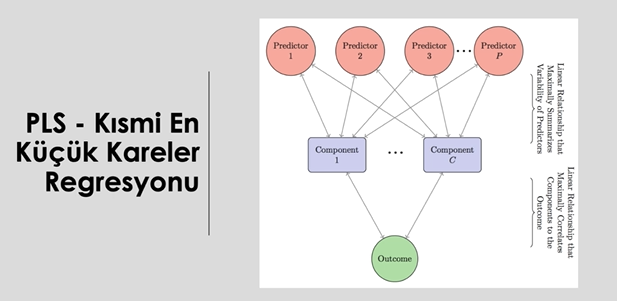 <br>
* Çok boyutluluk laneti ***p > n*** (p = değişken | feature , n = örneklem)
* Çoklu doğrusal bağlantı problemi
* PLS de PCR gibi bağımsız değişkenlerin doğrusal
  kombinasyonlarını bulur. Bu doğrusal kombinasyonlar
  bileşen ya da latent değişken olarak adlandırılır.
* PLS NIPALS'in özel bir halidir, iteratif olarak bağımlı değişken
  ile
  yüksek korelasyona sahip değişenler arasındaki gizil (latent)
  ilişkiyi bulmaya çalışır.

### Ek Bilgiler
* PCR'da doğrusal kombinasyonlar yani bileşenler ***bağımsız değişken <br>
  uzağındaki değişkenliği*** maksimum şekilde özetleyecek şekilde <br>
  oluşturulur. (***yani korelasyonu düşük tutmak ana hedeftir***)<br>
* Bu durum bağımlı değişkeni ***açıklama yeteneği olmamasına*** sebep
  olmakta.
* PLS'te ise ***bileşenler bağımlı değişken ile olan kovaryansı*** maksimum
  şekilde özetleyecek şekilde oluşturulur. (***ana hedef açıklama yeteneği maximize etmek***)
* Değişkenler atılmak istenmiyorsa ve açıklanabilirlik aranıyorsa: PLS
  PLS, gözetimli boyut indirgeme prosedürü, PCR gözetimsiz boyut
  indirgeme prosedürü olarak görülebilir.
* İki yönteminde bir tunning parametresi vardır o da bileşen sayısıdır.
* Optimum bileşen sayısını belirlemek için CV yöntemi kullanılır.

## PLS - Uygulama

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()

In [4]:
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y   = df['Salary']
X_  = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X   = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)

In [5]:
# test-train

In [6]:
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [7]:
# PLS

In [8]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [13]:
## n_components = 2 olmasına rağmen ß sayısının p adet olmasının sebebi nedir?

# yeni bir gözlem geldiğinde bu gözlemin p den 2 ye indirgenmesini isteyemeyiz.
# bu sebep ile katsayılar p adet oluşturulur ve pls model aralarından birkaçını seçer.

In [14]:
pls_model = PLSRegression(n_components=2).fit(X_train,y_train)

In [15]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

### Tahmin

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error , r2_score

pls_model.predict(X_train)[:10]

In [25]:
y_pred = pls_model.predict(X_train)

In [26]:
# basit meansquared error hesabı & validasyon olmadan

In [24]:
np.sqrt(mean_squared_error(y_train,y_pred))

310.1167593109696

In [29]:
# basit r2 hesabı & validasyon olmadan

In [32]:
r2_score(y_train,y_pred)

0.5140424486535481

In [33]:
# test mse & validasyon yok

In [35]:
y_pred = pls_model.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

In [38]:
# test r2 & validasyon yok

In [39]:
r2_score(y_test,y_pred)

0.2678940112232917

### Model Tuning

In [45]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
# CV 

In [48]:
cv_10 = KFold(n_splits=10,shuffle = True,random_state=1)

In [ ]:
# hata hesaplamak için döngü

In [49]:
RMSE = []

for i in range(1,X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1 * cross_val_score(pls, X_train, y_train , cv = cv_10 , scoring = 'neg_mean_squared_error')).mean()
    
    RMSE.append(score)

In [50]:
# sonuçların görselleştirilmesi

In [52]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Salary')

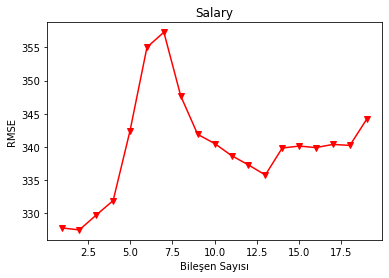

In [54]:
plt.plot(np.arange(1,X_train.shape[1] + 1), np.array(RMSE), '-v' , c = 'r')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary')

In [55]:
# n_components = 2 => best choice

In [56]:
# final model

In [57]:
pls_model = PLSRegression(n_components=2).fit(X_train,y_train)

In [58]:
y_pred = pls_model.predict(X_test)

In [59]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

## Ridge Regresyon
burada ß değerleri bulma işlemimizde ceza uygulama methodunu kullanıyor olması <br>

Linear Regresyondaki ***bileşen doğrusallığı*** ve ***çok boyuttluluk*** çıkmazını ***düzeltmek için*** çıkmış bir diğer methodtur. <br>

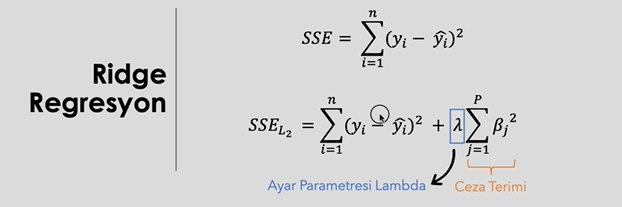 <br>

***SSE-l2  nedir ?*** <br>
L2 ß'nın üssünü belirtir. <br>
 
***λ nedir?*** <br>
bir hiper-parametredir. Bu parametreyi düzenleyerek ceza büyüklüğünü ayarlayabiliriz. <br>

### Bazı Bilgiler
* ***Aşırı öğrenmeye karşı dirençli.*** 
* ***Yanlıdır*** fakat ***varyansı düşüktür***. (Bazen yanlı modelleri daha
çok tercih ederiz. )
* ***Çok fazla paremetre*** olduğunda EKK'ya (En Küçük Kareler MSE) göre daha iyidir.
* Çok boyutluluk lanetine karşı çözüm sunar.
* Çoklu doğrusal bağlantı problemi olduğunda etkilidir.
* Tüm değişkenler ile model kurar. ***İlgisiz değişkenleri modelden çıkarmaz***, katsayılarını sıfıra yaklaştırır.
* λ kritik roldedir. ***İki terimin*** (formüldeki) göreceli etkilerini ***kontrol etmeyi sağlar.***
* λ için iyi bir ***değer bulunması*** önemlidir. Bunun için ***CV yöntemi*** kullanılır.

### Model

In [66]:
from sklearn.model_selection import train_test_split

In [60]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()

In [61]:
# dummy

In [65]:
ms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,ms[['League_N','Division_W','NewLeague_N']]],axis=1)

In [67]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [68]:
from sklearn.linear_model import Ridge

In [69]:
ridge_model = Ridge(alpha = 0.1).fit(X_train,y_train)

In [70]:
ridge_model

Ridge(alpha=0.1)

In [73]:
# katsayılar 

In [74]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [78]:
lambdalar = 10 ** np.linspace(10,-2,100) * 0.5 # lambda değerlerimiz

In [79]:
# birden fazla lambda değerinde katsayılarımız

Text(0.5, 1.0, 'Düzenleştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları')

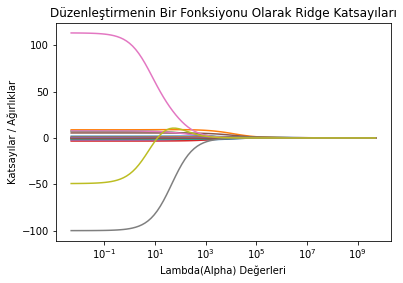

In [83]:
ridge_model = Ridge()
katsayılar = []

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayılar.append(ridge_model.coef_)

ax = plt.gca()
ax.plot(lambdalar,katsayılar)
ax.set_xscale('log') # logaritmik grafik yaptık yoksa anlaşılması zor

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar / Ağırlıklar')
plt.title('Düzenleştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları')

In [84]:
# görüldüğü üzere tüm ß' değerleri modelimizde aktif. Fakat bazıları sıfıra çok yakın.
# modelden ağırlık atmak yok ama onu neredeyse hiç etmek var.
# böylece tüm ß'lar kullanılarak model oluşturulmuş oldu

### Tahmin

In [88]:
y_pred = ridge_model.predict(X_test)

In [89]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.0517922282844

In [90]:
# r2

In [91]:
r2_score(y_test,y_pred)

0.411084490506761

### Model Tuning
yukarıdaki çizdiğimiz katsayı grafiğindeki en fit katsayı değerini sağlayan lambda değerini bulup. Fit edeceğiz

In [92]:
lambdalar = 10 ** np.linspace(10,-2,100) * 0.5 

In [93]:
from sklearn.linear_model import RidgeCV

In [96]:
# cross validation işlemi için kendi model classı var

In [94]:
ridge_cv = RidgeCV(alphas= lambdalar, scoring = 'neg_mean_squared_error', normalize = True) 

In [97]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [100]:
ridge_cv.alpha_ # optimum lambda değeri

0.7599555414764666

In [101]:
# final model

In [102]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_ , normalize = True).fit(X_train, y_train)

In [103]:
ridge_tuned.coef_

array([ 1.44624890e-01,  1.04791010e+00,  1.36872965e+00,  1.20061792e+00,
        7.82870997e-01,  1.55552882e+00,  3.76433192e+00,  1.20382822e-02,
        5.32415433e-02,  2.55307367e-01,  1.08012329e-01,  9.63035626e-02,
        8.68878351e-02,  1.62796122e-01,  3.20045418e-02, -1.01265296e+00,
        2.89891038e+01, -6.76670272e+01,  1.27302535e+01])

In [105]:
# tahmin

In [106]:
y_pred = ridge_tuned.predict(X_test)

In [108]:
np.sqrt(mean_squared_error(y_test,y_pred)) # tune edince eski halinden fit oldu

386.6826429756415

## Lasso Regresyon

***Ridge regresyon gibi*** ß değerlerine ***ceza uygulama*** yapar. Fakat bu ***ceza uygulamayı aşırı*** yaptığından ***ß değerleri yok olur.*** <br>
Bu yöntemle ***değişken eleme*** de yapmış olur . <br>
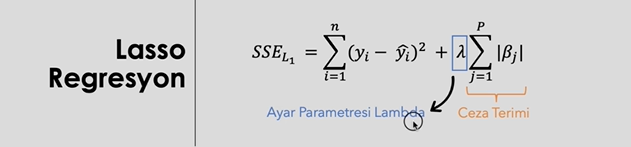

### Bazı Özellikler 
* Ridge regresyonun ilgili-ilgisiz tüm değişkenleri ***modelde bırakma dezavantajını gidermek*** için önerilmiştir.
* Lasso'da katsayıları sıfıra yaklaştırır.
* Fakat L1 normu ***λ yeteri kadar büyük olduğunda*** bazı
  katsayıları ***sıfır yapar.*** Böylece değişken seçimi yapmış
  olur.
* λ'nin ***doğru seçilmesi çok önemlidir,*** burada da ***CV***
  kullanılır.
* ***Ridge ve Lasso*** yöntemleri ***birbirinden üstün değildir.***

### λ Ayar Parametresinin Belirlenmesi


* λ'nın ***sifir olduğu yer EKK (MSE)'dır.*** HKT(MSE)'yi minimum yapan X'yı arıyoruz
* λ için belirli değerleri içeren bir küme seçilir ve her birisi için cross validation test hatası hesaplanır.
* küçük cross validation'ı veren λ ayar parametresi olarak seçilir.
* Son olarak seçilen bu λ ile model yeniden tüm gözlemlere fit edilir.


### Model

In [109]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [110]:
from sklearn.linear_model import Lasso

In [111]:
lasso_model = Lasso(alpha= 0.1).fit(X_train,y_train)

/home/bodur/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388074, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(


In [112]:
lasso_model

Lasso(alpha=0.1)

In [113]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

In [114]:
lambdalar = 10 ** np.linspace(10,-2,100) * 0.5 # lambda değerlerimiz

In [79]:
# birden fazla lambda değerinde katsayılarımız

/home/bodur/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741409332, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(
/home/bodur/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679891437, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(
/home/bodur/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.7561373971403, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(
/home/bodur/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:53

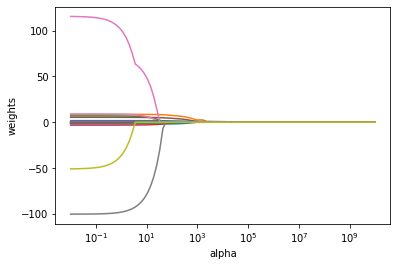

In [116]:
lasso_model = Lasso()
katsayılar = []

for i in lambdalar:
    lasso_model.set_params(alpha=i)
    lasso_model.fit(X_train,y_train)
    katsayılar.append(lasso_model.coef_)

ax = plt.gca()
ax.plot(lambdalar * 2,katsayılar)
ax.set_xscale('log') # logaritmik grafik yaptık yoksa anlaşılması zor

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [117]:
# sonlara doğru bazı katsayıların kesinlikle sıfır (0)

### Tahmin

In [119]:
lasso_model.predict(X_test)[:10]

array([ 614.38521218,  702.50058348, 1005.18293021,  414.27927984,
        398.11575546,  344.72563893,  665.1526738 ,  451.46769307,
        914.71629369,  644.42925411])

In [120]:
y_pred = lasso_model.predict(X_test)

In [121]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.8330124299743

### Model Tuning - Alpha değeri ayarlanması

In [122]:
from sklearn.linear_model import LassoCV

In [130]:
lasso_cv_model  = LassoCV(alphas = None , cv = 10 , max_iter = 10000, normalize = True) # alpha girmiyoruz / istersek girebiliriz fakat boş bırakilabilir.

In [131]:
lasso_cv_model.fit(X_train , y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [132]:
lasso_cv_model.alpha_ # alpha değerlerini biz vermedik kendisi üretti

0.39406126432470073

In [133]:
# yeni modelimiz

In [134]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_ )

In [135]:
lasso_tuned.fit(X_train,y_train)

/home/bodur/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523974, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.39406126432470073)

In [136]:
# test

In [137]:
y_pred = lasso_tuned.predict(X_test)

In [139]:
np.sqrt(mean_squared_error(y_pred,y_test)) # ridge den daha iyi sonuç aldık

356.5226376958366

## ElasticNet Regresyon
Amaç hata kareler toplamını (MSE) minimize eden katsayıları bu katsayılar ile bir ***ceza uygulayarak*** bulmaktır. ***ElasticNet L1 ve L2 yaklaşımını birleştirir***. <br>
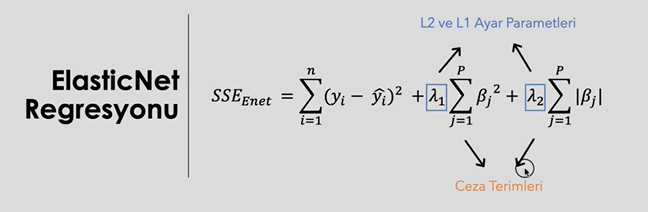

## Model

In [140]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [141]:
from sklearn.linear_model import ElasticNet

In [142]:
enet_model = ElasticNet().fit(X_train,y_train)

/home/bodur/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367316, tolerance: 3898.6869563806586
  model = cd_fast.enet_coordinate_descent(


In [143]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [144]:
enet_model.intercept_

-6.465955602112331

### Tahmin

In [147]:
y_pred = enet_model.predict(X_test)

In [148]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181246

In [149]:
r2_score(y_test,y_pred)

0.41070222469326867

### Model Tuning

In [150]:
from sklearn.linear_model import ElasticNetCV

In [158]:
# ek olarak içinde l1_ratio parametresi var bu parametre l1 ve l2 etki oranlarını temsil eder => 1 ise l1 /  0 ise l2 / default = 0.5 (eşit etki)
# istersek kendi alphas dizimizi verebiliriz. ve test ettirebiliriz
enet_cv_model = ElasticNetCV(cv=10, random_state = 0).fit(X_train,y_train)

In [152]:
enet_cv_model.alpha_

5230.7647364798695

In [153]:
# final model

In [154]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [156]:
y_pred = enet_tuned.predict(X_test)

In [157]:
np.sqrt(mean_squared_error(y_pred,y_test))

394.15280563218795